#### Kütüphaneler

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,r2_score

data = pd.read_csv("./vgsales.csv")

#### Veri Ön İşleme

In [2]:
# Veri çerçevesindeki eksik değerleri içeren satırları kaldır.
data.dropna(inplace=True)
# Veri çerçevesindeki eksik değerleri 0 ile doldur.
data.fillna(0,inplace=True) 
# Veri çerçevesinin ilk 5 satırını göster.
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Tablo Özellikleri
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Sütun Bilgisi
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Kütüphaneler

In [5]:
# Veri boyutunu ekrana yazdır.
print("Veri setinin boyutu : " + str(data.shape))

Veri setinin boyutu : (16291, 11)


In [6]:
# 'Year' sütunu değeri 0 olan satırları veri kümesinden çıkarır
# Year deaki degerler int olmalı
data.drop(data[data['Year'] == 0].index, inplace=True) 
data['Year'] = data['Year'].astype(int)

In [7]:
# Yıllara Göre Kaç Oyun Çıktıgı Hesaplanır.
data.Year.value_counts()  

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [8]:
# Tabloda nasil durdugunu gostermek icin rastgele 10 ornek getirmesini istedik 
data.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8875,8877,Tetris Attack,SNES,1995,Puzzle,Nintendo,0.00,0.00,0.15,0.00,0.15
16436,16439,Worms 2,PC,1997,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01
9829,9831,Skate City Heroes,Wii,2008,Sports,Zoo Digital Publishing,0.11,0.00,0.00,0.01,0.12
4614,4616,Arc the Lad III,PS,1999,Role-Playing,Sony Computer Entertainment,0.00,0.00,0.39,0.03,0.42
3578,3580,Army Men: Sarge's Heroes,PS,1999,Action,3DO,0.31,0.21,0.00,0.04,0.56
15823,15826,Busou Renkin: Youkoso Papillon Park e,PS2,2007,Action,Marvelous Interactive,0.00,0.00,0.02,0.00,0.02
16034,16037,WinBack 2: Project Poseidon,PS2,2006,Shooter,Tecmo Koei,0.01,0.01,0.00,0.00,0.01
8005,8007,The Last Airbender,DS,2010,Action,THQ,0.13,0.04,0.00,0.01,0.18
2727,2729,Final Fantasy Legend III,GB,1991,Role-Playing,SquareSoft,0.00,0.00,0.76,0.00,0.76
14780,14783,Neverwinter Nights Diamond,PC,2004,Role-Playing,Atari,0.00,0.02,0.00,0.00,0.03


#### Verılerın YIllara Göre Siralanması

In [9]:
data = data.sort_values(by="Year", ascending=True)
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5288,5290,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.1,0.07,0.03,0.35
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
5957,5959,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29


In [10]:
%pip install nbformat

# Benzersiz değerleri hesaplama
games = data['Name'].unique()
publishers = data['Publisher'].unique()
platforms = data['Platform'].unique()
genres = data['Genre'].unique()

# Grafik oluşturma
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=len(games),
    title={"text": "Games", "font": {"color": "gold", "size": 20}},
    number={"font": {"color": "gold", "size": 50}},
    domain={"row": 0, "column": 0}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=len(publishers),
    title={"text": "Publishers", "font": {"color": "green", "size": 20}},
    number={"font": {"color": "green", "size": 50}},
    domain={"row": 0, "column": 1}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=len(platforms),
    title={"text": "Platforms", "font": {"color": "darkviolet", "size": 20}},
    number={"font": {"color": "darkviolet", "size": 50}},
    domain={"row": 0, "column": 2}
))

fig.add_trace(go.Indicator(
    mode="number",
    value=len(genres),
    title={"text": "Genres", "font": {"color": "deepskyblue", "size": 20}},
    number={"font": {"color": "deepskyblue", "size": 50}},
    domain={"row": 0, "column": 3}
))

fig.update_layout(
    grid={"rows": 1, "columns": 4, "pattern": "independent"}
)

fig.show()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Platform ve tür bazında oyun sayısını hesaplama
genre_counts = data.groupby(['Platform', 'Genre']).size().reset_index(name='Count')

# Grafik oluşturma
fig = px.bar(
    genre_counts, 
    x='Platform', 
    y='Count', 
    color='Genre', 
    text='Count',
    hover_data={'Genre': True, 'Count': True},
    title="Genre Counts According to Platform",
    labels={'Count': 'Number of Games', 'Platform': 'Platform', 'Genre': 'Genre'}
)

# Grafik düzeni
fig.update_traces(texttemplate='%{text}', textposition='outside', cliponaxis=False)
fig.update_layout(
    xaxis=dict(title="Platform"),
    yaxis=dict(title="Count"),
    legend_title_text='Genre',
    plot_bgcolor='beige'
)

# Grafiği gösterme
fig.show()



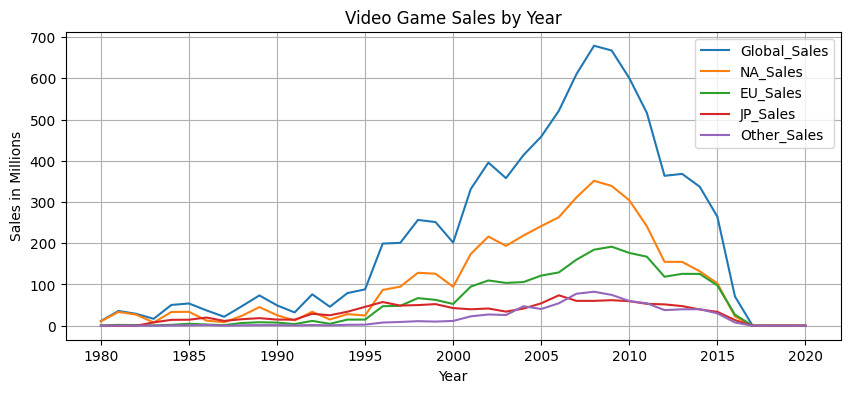

In [12]:
# Satış sütunlarını tanımlama
sales_columns = ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

# Yıllık satışları gruplama
yearly_sales = data.groupby("Year")[sales_columns].sum()

# Çizgi grafiği oluşturma
yearly_sales.plot(kind="line", figsize=(10, 4))
plt.title("Video Game Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales in Millions")
plt.legend(sales_columns)
plt.grid(True)
plt.show()


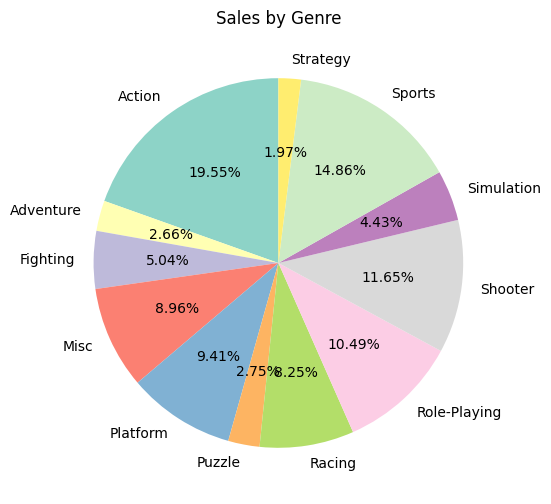

In [13]:
# Satış sütunlarını tanımlama
sales_columns = ["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

# Türlere göre satışları gruplama
genre_sales = data.groupby("Genre")[sales_columns].sum()

# Tüm türlerin toplam satışlarını hesaplama
genre_sales_total = genre_sales.sum(axis=1)

# Pasta grafiği oluşturma
genre_sales_total.plot(kind="pie", figsize=(10, 6), autopct="%1.2f%%", startangle=90, cmap="Set3")
plt.title("Sales by Genre")
plt.ylabel("")  # Y ekseni etiketini boş bırak
plt.show()


#### Korelasyon matrisi 

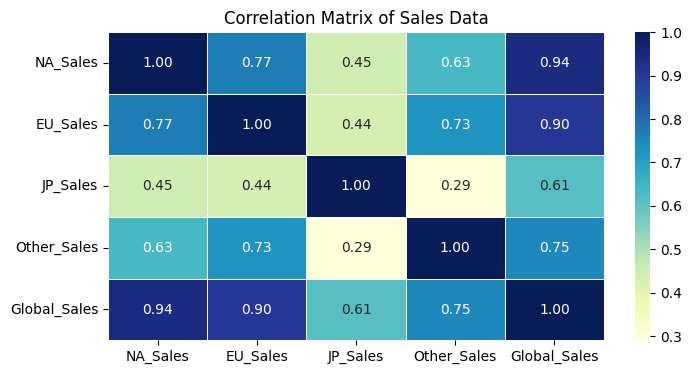

In [14]:
# Satış sütunlarını tanımlama
sales_columns = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

# İlgili sütunlar için korelasyon matrisi hesaplama
corr = data[sales_columns].corr()

# Korelasyon matrisi görselleştirme
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Sales Data")
plt.show()


#### Belli Pazarlardaki Satışların Aykırı Değer Oranları

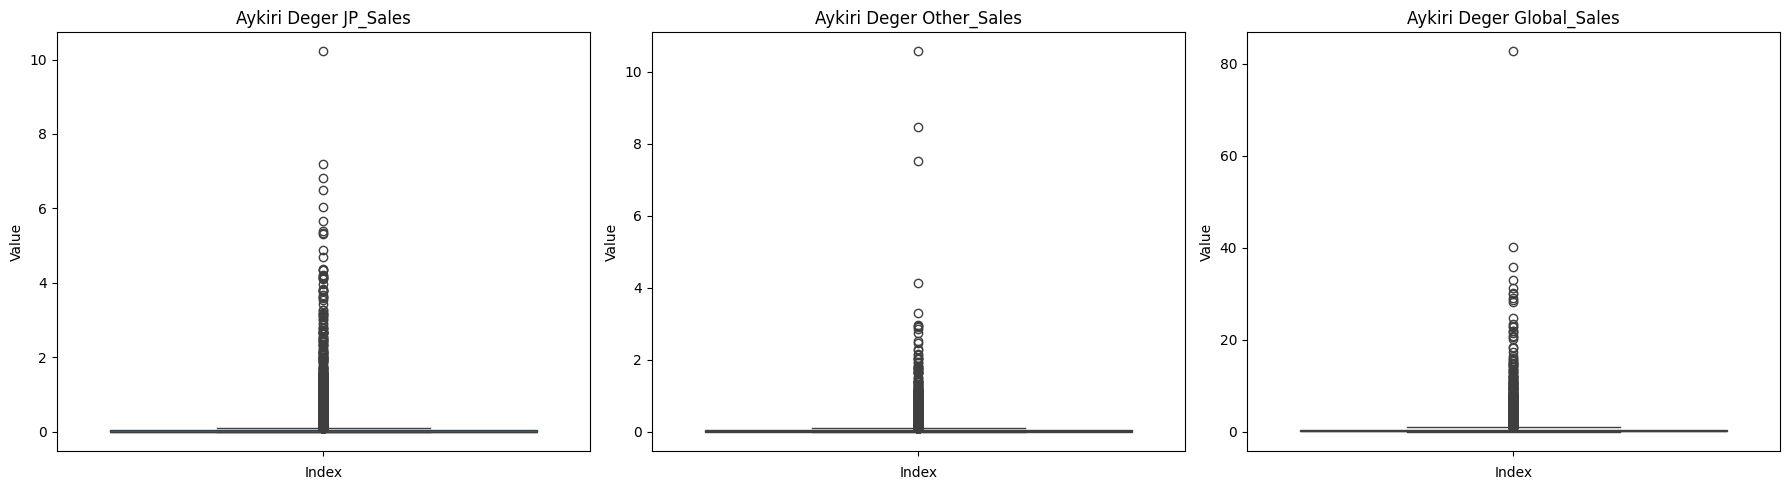

In [15]:
# Aykırı değerlerin görselleştirilmesi 
features = ['JP_Sales', 'Other_Sales', 'Global_Sales']

#grafiklerin yan yana koyulmasi 
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f'Aykiri Deger {feature}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.show()

##### Eğitim Öncesi Kullanılacak Verileri Hazırlama

In [16]:
#Bagimsiz(X) ve Bagimli(y) degiskeni belirleme
# Özellik ve hedef değişken seçimi
X = data[['EU_Sales', 'Other_Sales',"JP_Sales"]].values
y = data['Global_Sales'].values

# Verileri normalize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Polinomal Regresyon

In [17]:
# Polinomal özellikler oluşturma
degree = 2  # Polinom derecesi
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_scaled)

In [18]:
# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Test ve Egitim verilerinin boyutunu gorme 
x_train=X_train.T
x_test=X_test.T
y_train=y_train.T
y_test=y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x_train:  (10, 11403)
x_test:  (10, 4888)
y_train:  (11403,)
y_test:  (4888,)


In [19]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Tahminleri yapma
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

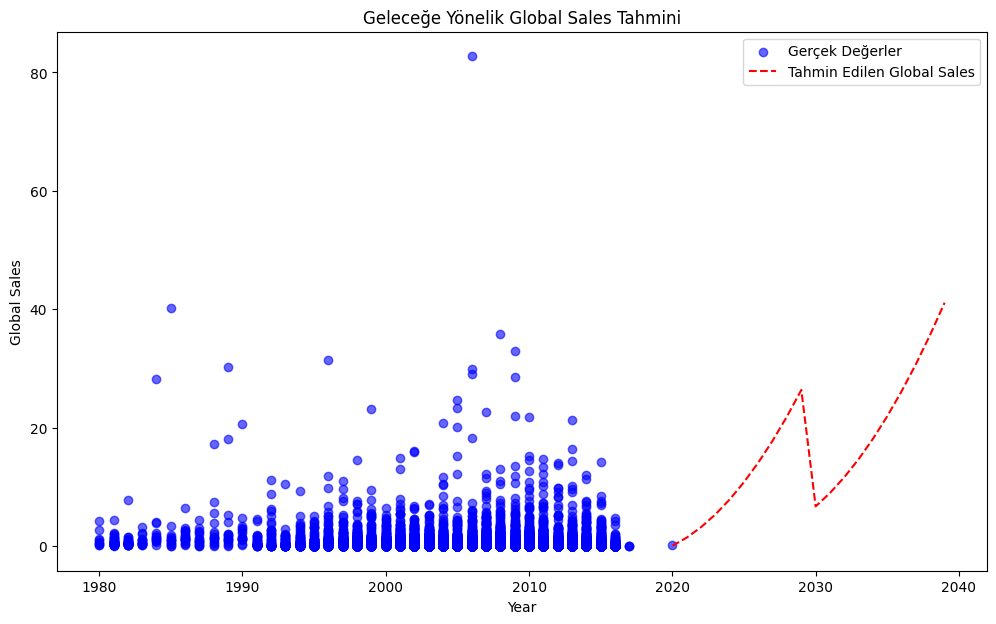

In [21]:
# Gelecek tahminleri için veri hazırlama
future_eu_sales = np.linspace(data['EU_Sales'].min(), data['EU_Sales'].max(), 10)
future_na_sales = np.linspace(data['NA_Sales'].min(), data['NA_Sales'].max(), 10)
future_jp_sales = np.linspace(data['JP_Sales'].min(), data['JP_Sales'].max(), 10)
future_X = np.array([[eu, na, jp] for eu in future_eu_sales for na in future_na_sales for jp in future_jp_sales])
future_X_scaled = scaler.transform(future_X)
future_X_poly = poly_features.transform(future_X_scaled)

# Gelecek tahminleri
future_global_sales = model.predict(future_X_poly)

# Grafik olarak gösterim
plt.figure(figsize=(12, 7))
plt.scatter(data['Year'], data['Global_Sales'], label='Gerçek Değerler', color='blue', alpha=0.6)
plt.plot(
    np.arange(2020, 2040), 
    future_global_sales[:20], 
    label='Tahmin Edilen Global Sales', 
    color='red', 
    linestyle='--'
)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Geleceğe Yönelik Global Sales Tahmini')
plt.legend()
plt.show()

In [22]:
# Eğitim ve test hatalarını hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R^2 skorları
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MAPE  (Ortalama mutlak yüzde hatası)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f'MAPE: {mape}%')

print("\nDoğrulama Seti Performansı:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("R2:", r2_score(y_train, y_train_pred))

print("\nTest Seti Performansı:")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R2:", r2_score(y_test, y_test_pred))



scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


MAPE: 113.83853619289322%

Doğrulama Seti Performansı:
MAE: 0.1776354093669721
MSE: 0.2725260464910598
R2: 0.895862192535359

Test Seti Performansı:
MAE: 0.1828439932803177
MSE: 0.2212270834726224
R2: 0.8937271309370196
Cross-validation scores: [0.88750361 0.91431305 0.83062729 0.70342497 0.72893611]
Mean cross-validation score: 0.8129610075700857
